# Application of Regression Techniques in Satellite Imagery Analysis

In the first session of week 5, we delved into an array of regression techniques, including polynomial regression, neural networks, and Gaussian processes, each offering unique perspectives and methodologies for modeling complex relationships within data. This week, we pivot our focus towards the practical application of these regression techniques to a challenging yet highly relevant problem in the field of satellite imagery analysis: predicting sea-ice concentration and the fraction of leads/melt ponds. Our dataset comprises 21 spectral bands from satellite imagery, each spanning over 5000 data points, which we aim to regress onto scalar values that may represent sea-ice concentration and lead/melt pond fractions across the same 5000 observations depending on what we want. In the previous notebook, we prepared such a dataset for us to apply the regression techniques.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing
Let's recall some key phases of our machine learning project cycle:

- **Data Collection**: Data is the cornerstone of any ML project. This stage involves gathering necessary data relevant to our problem. The quality, quantity, and variety of data can significantly influence the model's performance. For example, collecting satellite images like those from OLCI represents a common data collection process, with much of the raw data being publicly available online for download.

- **Data Preprocessing**: Raw data often requires cleaning and formatting before use. This step includes converting raw data into a format interpretable by ML models, handling missing values, normalizing data, and feature engineering. Previously, we introduced a method for creating a machine learning dataset using IRIS.

In the previous notebook, we completed the data collection phase of our cycle. Now, we move to data preprocessing. The primary task here is to split the data into training, validation, and testing sets, which will allow us to evaluate our model's performance after training.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

dataset_path = '/content/drive/MyDrive/GEOL0069/2324/Week_6/2425_test/s3_ML_dataset.npz' # change it to the directory where you saved the dataset from the last notebook

data = np.load(dataset_path)
input_features = data['X']
target_variables = data['y']

X_train, X_test, y_train, y_test = train_test_split(
    input_features, target_variables, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training targets shape:", y_train.shape)
print("Testing targets shape:", y_test.shape)


Training features shape: (11556, 21)
Testing features shape: (2889, 21)
Training targets shape: (11556,)
Testing targets shape: (2889,)


## Polynomial Regression {cite}`draper1998applied`

### Recall Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n$ th degree polynomial. Polynomial regression fits a nonlinear relationship between the value of $x$ and the corresponding conditional mean of $y$, denoted $E(y |x)$. Below code shows how we can apply it on our data.

The Mean Squared Error (MSE) on the test set is: 0.0031374039199429933


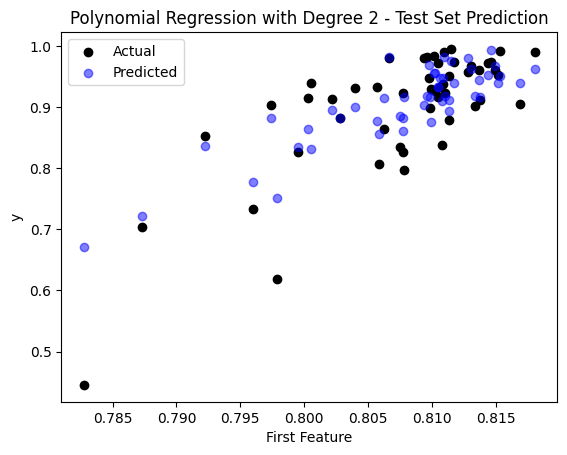

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

polynomial_features = PolynomialFeatures(degree=2)
X_poly_train = polynomial_features.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

X_poly_test = polynomial_features.transform(X_test)

y_pred_poly = model_poly.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred_poly)
print(f"The Mean Squared Error (MSE) on the test set is: {mse}")

sample_idx = np.random.choice(np.arange(len(y_test)), size=50, replace=False)
plt.scatter(X_test[sample_idx, 0], y_test[sample_idx], color='black', label='Actual')
plt.scatter(X_test[sample_idx, 0], y_pred_poly[sample_idx], color='blue', label='Predicted', alpha=0.5)
plt.title('Polynomial Regression with Degree 2 - Test Set Prediction')
plt.xlabel('First Feature')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
y_test

array([0.92356688, 0.8701482 , 0.97062987, ..., 0.80819498, 0.8700885 ,
       0.88825825])

In [ ]:
y_pred_poly

array([0.9067383 , 0.7709961 , 0.8955078 , ..., 0.87353516, 0.87646484,
       0.9160156 ], dtype=float32)

In [ ]:
import numpy as np

# Assuming y_test and y_pred_poly are NumPy arrays
# Compute Mean Squared Error
mse = np.mean((y_test - y_pred_poly) ** 2)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0031374039199429933


## Neural Networks {cite}`goodfellow2016deep`

### Recall Important Components of Neural Networks

1. **Layers**: Composed of neurons, layers are the fundamental units of neural networks. A fully connected network consists of input, hidden, and output layers.
2. **Neurons**: Each neuron in a layer is connected to all neurons in the previous and next layers, processing the input data and passing on its output.
3. **Weights and Biases**: These parameters are adjusted during training to minimize the network's error in predicting the target variable.
4. **Activation Functions**: Functions like ReLU or Sigmoid introduce non-linearities, allowing the network to model complex relationships.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0291
Epoch 2/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064
Epoch 3/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 4/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0048
Epoch 5/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044
Epoch 6/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043
Epoch 7/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046
Epoch 8/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041
Epoch 9/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037
Epoch 10/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
The Mean Squared Error (MSE) on the test set is: 0.003859773428732748


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,045 (840.02 KB)

 Trainable params: 71,681 (280.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 143,364 (560.02 KB)

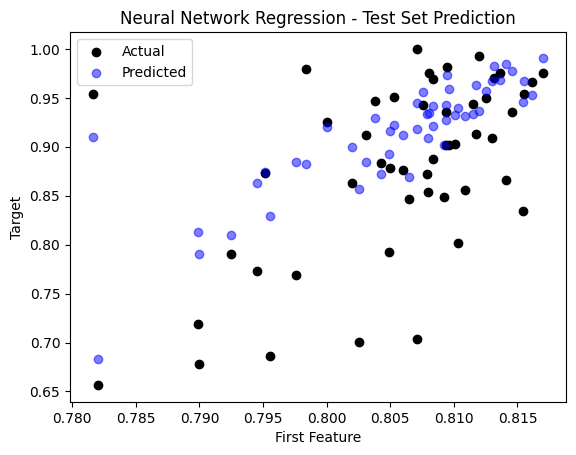

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

model_nn = Sequential([
    Dense(256, activation='relu', input_shape=(21,)),
    Dense(256, activation='relu'),
    Dense(1)
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')

model_nn.fit(X_train, y_train, epochs=10)

y_pred = model_nn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"The Mean Squared Error (MSE) on the test set is: {mse}")

model_nn.summary()

y_pred_nn = y_pred.flatten()

sample_idx = np.random.choice(np.arange(len(y_test)), size=50, replace=False)

plt.scatter(X_test[sample_idx, 0], y_test[sample_idx], color='black', label='Actual')
plt.scatter(X_test[sample_idx, 0], y_pred_nn[sample_idx], color='blue', label='Predicted', alpha=0.5)
plt.title('Neural Network Regression - Test Set Prediction')
plt.xlabel('First Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


## Gaussian Processes  {cite}`bishop2006pattern`


### Recall Gaussian Processes

A Gaussian Process (GP) is essentially an advanced form of a Gaussian (or normal) distribution, but instead of being over simple variables, it's over functions. Imagine a GP as a method to predict or estimate a function based on known data points. Note that we are using sparse GP here as the data we have here is somethat high-dimensional (21 bands).

In [ ]:
pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


The Mean Squared Error (MSE) on the test set is: 0.003859773428732748


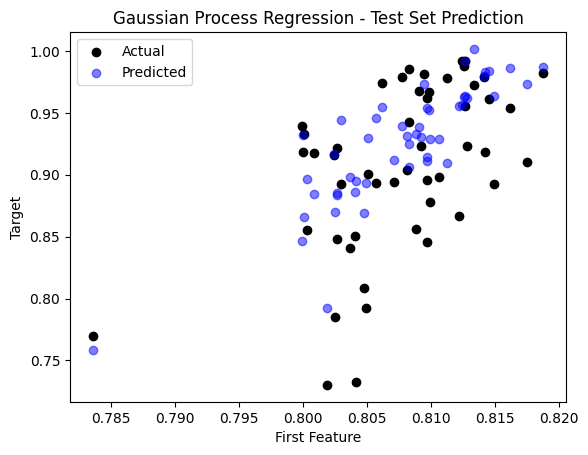

In [ ]:
import GPy
from sklearn.metrics import mean_squared_error

kernel = GPy.kern.RBF(input_dim=21)
num_inducing = 100

gp = GPy.models.SparseGPRegression(X_train, y_train.reshape(-1, 1), kernel, num_inducing=num_inducing)

gp.optimize(messages=True)

y_pred_gp, variance = gp.predict(X_test)
y_pred_gp = y_pred.flatten()
sigma = np.sqrt(variance).flatten()

mse = mean_squared_error(y_test, y_pred_gp)
print(f"The Mean Squared Error (MSE) on the test set is: {mse}")

sample_idx = np.random.choice(np.arange(len(y_test)), size=50, replace=False)
plt.scatter(X_test[sample_idx, 0], y_test[sample_idx], color='black', label='Actual')
plt.scatter(X_test[sample_idx, 0], y_pred_gp[sample_idx], color='blue', label='Predicted', alpha=0.5)
plt.title('Gaussian Process Regression - Test Set Prediction')
plt.xlabel('First Feature')
plt.ylabel('Target')
plt.legend()
plt.show()



## Comparison of Performances


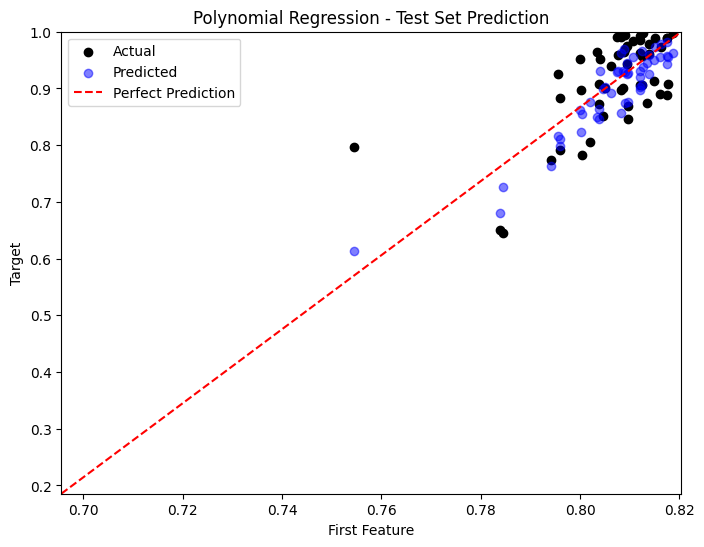

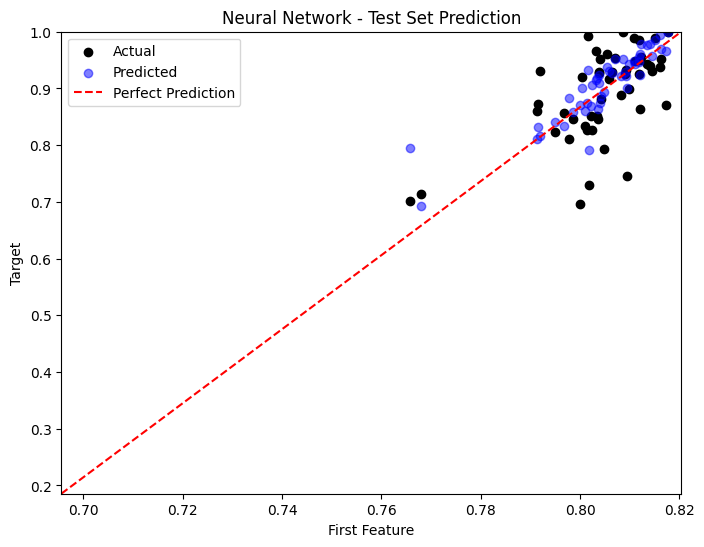

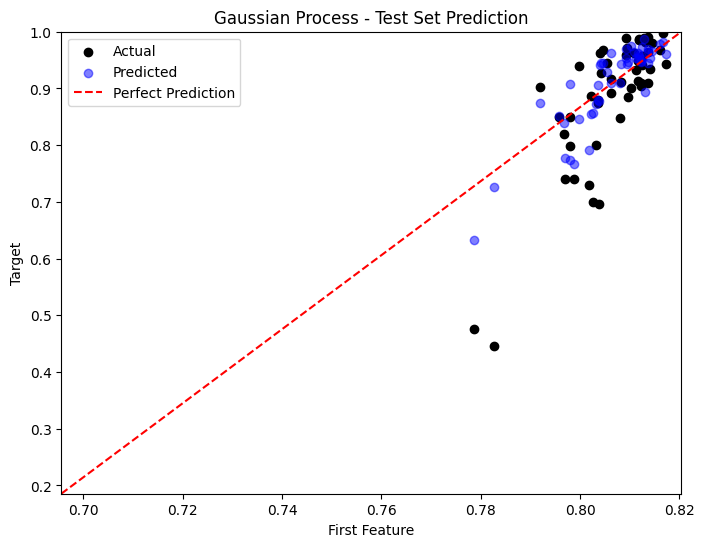

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
y_min, y_max = y_test.min(), y_test.max()

predictions = [y_pred_poly, y_pred_nn, y_pred_gp]
titles = ['Polynomial Regression', 'Neural Network', 'Gaussian Process']

for i, y_pred in enumerate(predictions):
    plt.figure(figsize=(8, 6))
    sample_idx = np.random.choice(np.arange(len(y_test)), size=50, replace=False)
    plt.scatter(X_test[sample_idx, 0], y_test[sample_idx], color='black', label='Actual')
    plt.scatter(X_test[sample_idx, 0], y_pred[sample_idx], color='blue', label='Predicted', alpha=0.5)
    plt.plot([x_min, x_max], [y_min, y_max], 'r--', label='Perfect Prediction')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(titles[i] + ' - Test Set Prediction')
    plt.xlabel('First Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()


## Rollout
Now we can test our model on another part of OLCI image. We will use polynomial regression as an example.

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


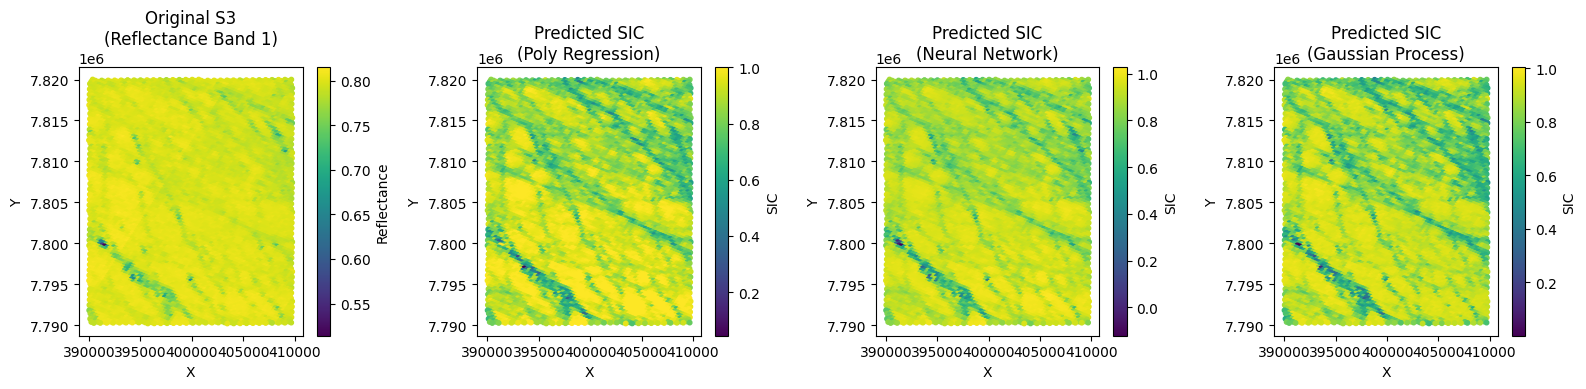

In [14]:
import numpy as np
import matplotlib.pyplot as plt


# 1. Load the new S3 data
s3_test = np.load('/content/drive/MyDrive/GEOL0069/2324/Week_6/2425_test/s3_zoomed_data_test.npz')
s3_x_new = s3_test['x']
s3_y_new = s3_test['y']
s3_reflectance_new = s3_test['reflectance']


# 2. Make Predictions using the 3 Models

# Prediction for Polynomial Regression:
X_poly_new = polynomial_features.transform(s3_reflectance_new)
y_pred_poly_new = model_poly.predict(X_poly_new)

# Prediction for Neural Network:
y_pred_nn_new = model_nn.predict(s3_reflectance_new).flatten()

# Prediction for Gaussian Process Regression:
y_pred_gp_new, variance_gp = gp.predict(s3_reflectance_new)
y_pred_gp_new = y_pred_gp_new.flatten()


# 3. Plot the Original S3 Data and Predicted SIC for each Model

plt.figure(figsize=(16, 4))

# Plot 1: Original S3 data (using reflectance band 1 as a proxy for visualization)
plt.subplot(1, 4, 1)
sc1 = plt.scatter(s3_x_new, s3_y_new, c=s3_reflectance_new[:, 0], cmap='viridis', s=10)
plt.title("Original S3\n(Reflectance Band 1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(sc1, label='Reflectance')

# Plot 2: Predicted SIC using Polynomial Regression
y_pred_poly_new = np.clip(y_pred_poly_new, 0, 1)
plt.subplot(1, 4, 2)
sc2 = plt.scatter(s3_x_new, s3_y_new, c=y_pred_poly_new, cmap='viridis', s=10)
plt.title("Predicted SIC\n(Poly Regression)")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(sc2, label='SIC')

# Plot 3: Predicted SIC using Neural Network
plt.subplot(1, 4, 3)
sc3 = plt.scatter(s3_x_new, s3_y_new, c=y_pred_nn_new, cmap='viridis', s=10)
plt.title("Predicted SIC\n(Neural Network)")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(sc3, label='SIC')

# Plot 4: Predicted SIC using Gaussian Process
plt.subplot(1, 4, 4)
sc4 = plt.scatter(s3_x_new, s3_y_new, c=y_pred_gp_new, cmap='viridis', s=10)
plt.title("Predicted SIC\n(Gaussian Process)")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(sc4, label='SIC')

plt.tight_layout()
plt.show()
